# Tensorflow Linear Regression Example

###  나이, 체중에 대한 혈액지방함량 문제

https://pinkwink.kr/1082 출처

In [1]:
# !pip install tqdm

In [2]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.11.0


In [3]:
raw_data = np.genfromtxt('./X09.txt',skip_header = 36)

In [4]:
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [5]:
from mpl_toolkits.mplot3d import Axes3D

In [6]:
xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype = np.float32)
zs = np.array(raw_data[:,4], dtype = np.float32)

In [7]:
xs

array([84., 73., 65., 70., 76., 69., 63., 72., 79., 75., 27., 89., 65.,
       57., 59., 69., 60., 79., 75., 82., 59., 67., 85., 55., 63.],
      dtype=float32)

In [8]:
ys

array([46., 20., 52., 30., 57., 25., 28., 36., 57., 44., 24., 31., 52.,
       23., 60., 48., 34., 51., 50., 34., 46., 23., 37., 40., 30.],
      dtype=float32)

In [9]:
zs

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.], dtype=float32)

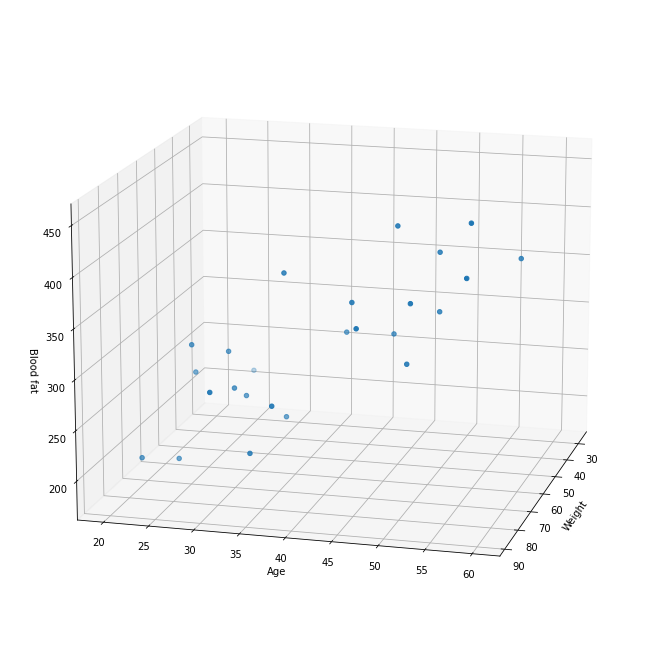

In [12]:
fig = plt.figure(figsize =(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15,15)

plt.show()

In [13]:
x_data = np.array(raw_data[:,2:4], dtype = np.float32)
y_data = np.array(raw_data[:,4], dtype = np.float32)

y_data = y_data.reshape((25,1))

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(shape=[None, 2], dtype=tf.float32)

X = tf.placeholder(tf.float32, shape=[None, 2], name='x-input')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='y-input')

Instructions for updating:
non-resource variables are not supported in the long term


In [14]:
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

hypothesis = tf.matmul(X,W) + b

In [15]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis -  Y))

# Minimize
optimizer  = tf.train.GradientDescentOptimizer(learning_rate=  0.0001)
train = optimizer.minimize(cost)

In [16]:
# Launch the graph in a session
sess = tf.Session()
# initalizes global variables in the graph
sess.run(tf.global_variables_initializer())

cost_history = []

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict = {X : x_data, Y:y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val)
        cost_history.append(sess.run(cost, feed_dict = {X: x_data, Y:y_data}))

0 Cost: 47759.203
10 Cost: 3162.1638
20 Cost: 2680.5178
30 Cost: 2379.2139
40 Cost: 2190.724
50 Cost: 2072.8057
60 Cost: 1999.0339
70 Cost: 1952.8788
80 Cost: 1923.9993
90 Cost: 1905.9261
100 Cost: 1894.6138
110 Cost: 1887.5297
120 Cost: 1883.0916
130 Cost: 1880.3086
140 Cost: 1878.5604
150 Cost: 1877.4595
160 Cost: 1876.7644
170 Cost: 1876.3228
180 Cost: 1876.0396
190 Cost: 1875.8549
200 Cost: 1875.7334
210 Cost: 1875.65
220 Cost: 1875.591
230 Cost: 1875.5472
240 Cost: 1875.5122
250 Cost: 1875.4843
260 Cost: 1875.4594
270 Cost: 1875.4368
280 Cost: 1875.4159
290 Cost: 1875.3962
300 Cost: 1875.3767
310 Cost: 1875.3578
320 Cost: 1875.3389
330 Cost: 1875.3202
340 Cost: 1875.3015
350 Cost: 1875.2828
360 Cost: 1875.2646
370 Cost: 1875.246
380 Cost: 1875.227
390 Cost: 1875.2087
400 Cost: 1875.1904
410 Cost: 1875.1719
420 Cost: 1875.1538
430 Cost: 1875.1353
440 Cost: 1875.1162
450 Cost: 1875.0983
460 Cost: 1875.0796
470 Cost: 1875.0618
480 Cost: 1875.0435
490 Cost: 1875.0242
500 Cost: 1875.00

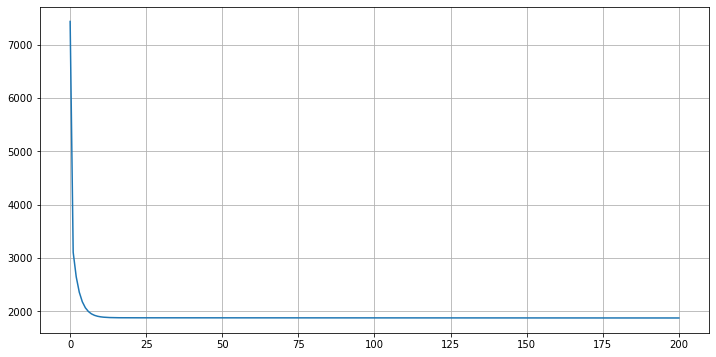

In [17]:
# Show the cost function
plt.figure(figsize=[12,6])
plt.plot(cost_history)
plt.grid()
plt.show()

In [18]:
# 예측해보기 100kg 에 나이 40
print(sess.run(hypothesis, feed_dict = {X: [[100,40]]}))

[[353.3816]]


In [19]:
# 예측해보기 60kg 에 나이 25
print(sess.run(hypothesis, feed_dict = {X: [[60,25]]}))

[[218.7325]]


In [20]:
# 예측해보기 60kg 에 나이 25
print(sess.run(hypothesis, feed_dict = {X: [[42,23]]}))

[[184.65141]]


In [21]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

In [29]:
W_ = sess.run(W)
b_ = sess.run(b)

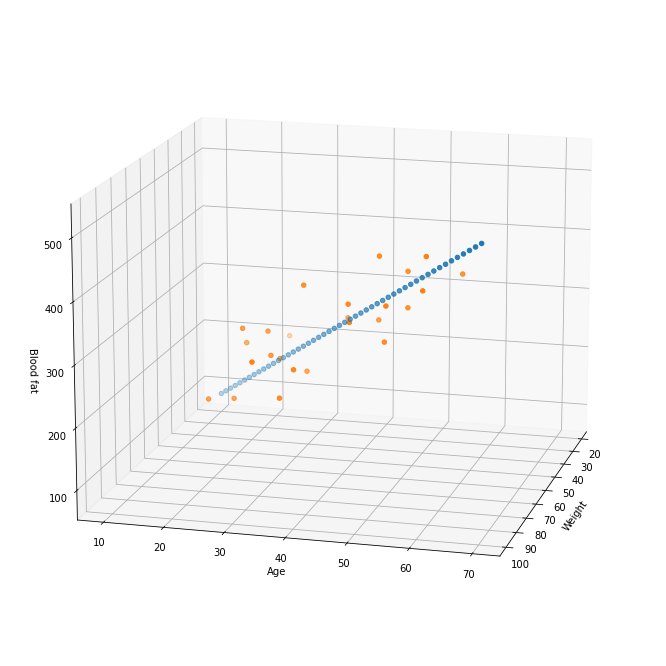

In [31]:
X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, Z)
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)

plt.show()